## Movielens Case Study
Course-end Project 3


DESCRIPTION

### Background of Problem Statement :

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.


### Problem Objective :

Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. You need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.


### Analysis Tasks to be performed:

1. Import the three datasets.


2. Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId).


3. Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
     1. User Age Distribution 
     2. User rating of the movie “Toy Story”.
     3. Top 25 movies by viewership rating.
     4. Find the ratings for all the movies reviewed by for a particular user of user id = 2696.
     


4. Feature Engineering:
    
    Use column genres:

      1. Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres).
      2. Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
      3. Determine the features affecting the ratings of any particular movie.
      4. Develop an appropriate model to predict the movie ratings.

#### Dataset Description :

These files contain 1,000,209 anonymous ratings of approximately 3,900 movies made by 6,040 MovieLens users who joined MovieLens in 2000.

### 1. Ratings.dat

UserID - Unique identification for each user. UserIDs range between 1 and 6040.

MovieID	- Unique identification for each and ranges between 1 and 3952.

Rating - User rating for each movie. Ratings are made on a 5-star scale (whole-star ratings only).

Timestamp - Timestamp generated while adding user review. A timestamp is represented in seconds since the epoch is returned by time(2).

Each user has at least 20 ratings.
 

### 2. Users.dat

UserID - Unique identification for each user.

Genere - Category of each movie.

Age - User’s age.

Occupation - User’s Occupation.

Zip-code - Zip Code for the user’s location.

Gender is denoted by an "M" for male and "F" for female.

Age is chosen from the following ranges:

 
    Value	Description
    1	"Under 18"
    18	"18-24"
    25	"25-34"
    35	"35-44"
    45	"45-49"
    50	"50-55"
    56	"56+"

 
Occupation is chosen from the following choices:


    0	"other" or not specified
    1	"academic/educator"
    2	"artist”
    3	"clerical/admin"
    4	"college/grad student"
    5	"customer service"
    6	"doctor/health care"
    7	"executive/managerial"
    8	"farmer"
    9	"homemaker"
    10	"K-12 student"
    11	"lawyer"
    12	"programmer"
    13	"retired"
    14	 "sales/marketing"
    15	"scientist"
    16	 "self-employed"
    17	"technician/engineer"
    18	"tradesman/craftsman"
    19	"unemployed"
    20	"writer”



### 3. Movies.dat

MovieID	- Unique identification for each movie.

Title - A title for each movie. Titles are identical to titles provided by the IMDB (including year of release).

Genres - Category of each movie.

Genres are pipe-separated and are selected from the following genres:

    Action
    Adventure
    Animation
    Children's
    Comedy
    Crime
    Documentary
    Drama
    Fantasy
    Film-Noir
    Horror
    Musical
    Mystery
    Romance
    Sci-Fi
    Thriller
    War
    Western



Some MovieIDs do not correspond to a movie due to accidental duplicate entries and/or test entries
Movies are mostly entered by hand, so errors and inconsistencies may exist

In [53]:
#Importing necessary libraries

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score

#### Q1. Import the three datasets.

In [54]:
#Importing datasets

movies = pd.read_csv('movies.dat', sep='::',engine='python', names=['MovieID','Title','Genres'])

ratings = pd.read_csv('ratings.dat', sep='::',engine='python',names=['UserID','MovieID','Rating','Timestamp'])

users = pd.read_csv('users.dat', sep='::',engine='python',names=['UserID','Gender','Age','Occupation','Zip-code'])

In [55]:
print(movies.head(),'\n\n', movies.shape )
print('\n\n')
print(ratings.head(),'\n\n', ratings.shape )
print('\n\n')
print(users.head(),'\n\n', users.shape )

   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy 

 (3883, 3)



   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291 

 (1000209, 4)



   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455 

 (6040, 5)


#### Q2. Create a new dataset [Master_Data] 

In [56]:
#Combining all datasets to create Master dataset

Master_Data = pd.merge(movies, (pd.merge(ratings, users, on = 'UserID')), on = 'MovieID')

Master_Data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370


In [57]:
#Dropping unnecessary columns and copying data into new dataset for further analysis

Master_df = Master_Data.drop(['Timestamp', 'Zip-code'], axis=1) 

Master_df.head(2)

,MovieID,Title,Genres,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,F,50,9


In [58]:
#Checking Statistical summary 

Master_df.describe()

,MovieID,UserID,Rating,Age,Occupation
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,1.865540e+03,3.024512e+03,3.581564e+00,2.973831e+01,8.036138e+00
std,1.096041e+03,1.728413e+03,1.117102e+00,1.175198e+01,6.531336e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.030000e+03,1.506000e+03,3.000000e+00,2.500000e+01,2.000000e+00
50%,1.835000e+03,3.070000e+03,4.000000e+00,2.500000e+01,7.000000e+00
75%,2.770000e+03,4.476000e+03,4.000000e+00,3.500000e+01,1.400000e+01
max,3.952000e+03,6.040000e+03,5.000000e+00,5.600000e+01,2.000000e+01


In [59]:
#Checking for missing values

Master_df.isnull().sum()

MovieID       0
Title         0
Genres        0
UserID        0
Rating        0
Gender        0
Age           0
Occupation    0
dtype: int64

In [60]:
#Checking random samples for discripancies

Master_df.sample(15)

,MovieID,Title,Genres,UserID,Rating,Gender,Age,Occupation
616354,2288,"Thing, The (1982)",Action|Horror|Sci-Fi|Thriller,5103,3,F,35,16
988069,3863,"Cell, The (2000)",Sci-Fi|Thriller,1060,3,M,18,10
239749,969,"African Queen, The (1951)",Action|Adventure|Romance|War,3015,5,M,56,6
819899,3060,"Commitments, The (1991)",Comedy|Drama,990,3,M,18,6
493030,1779,Sphere (1998),Adventure|Sci-Fi|Thriller,4829,3,M,25,0
562029,2057,"Incredible Journey, The (1963)",Adventure|Children's,3971,4,F,18,4
837996,3114,Toy Story 2 (1999),Animation|Children's|Comedy,4989,5,M,25,0
456170,1616,"Peacemaker, The (1997)",Action|Thriller|War,5837,4,M,25,7
655511,2406,Romancing the Stone (1984),Action|Adventure|Comedy|Romance,1873,3,M,35,7
594672,2159,Henry: Portrait of a Serial Killer (1990),Crime|Horror,173,5,M,25,0


In [61]:
#Checking for Duplicate entries

Master_df.duplicated().sum()

0

#### Q3.Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
    . User Age Distribution 
    . User rating of the movie “Toy Story”.
    . Top 25 movies by viewership rating.
    . Find the ratings for all the movies reviewed by for a particular user of user id = 2696

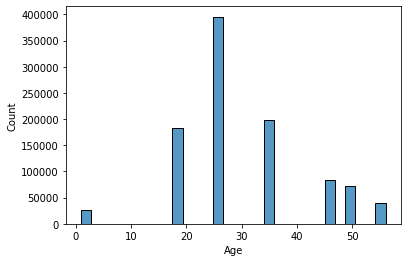

In [62]:
sns.histplot(data = Master_df, x = 'Age', bins=30)
plt.show()

From the above distribution plot, we can say that maximum users are around age of 25 years.

In [63]:
Toy_Story = Master_df[Master_df.Title.str.contains('Toy Story') == True]
Toy_Story_Rating = Toy_Story.groupby(["Title","Rating"]).size()
Toy_Story_Rating

Title               Rating
Toy Story (1995)    1          16
                    2          61
                    3         345
                    4         835
                    5         820
Toy Story 2 (1999)  1          25
                    2          44
                    3         214
                    4         578
                    5         724
dtype: int64

In [64]:
Toy_Story_Rating.unstack()

Rating,1,2,3,4,5
Title,,,,,
Toy Story (1995),16,61,345,835,820
Toy Story 2 (1999),25,44,214,578,724


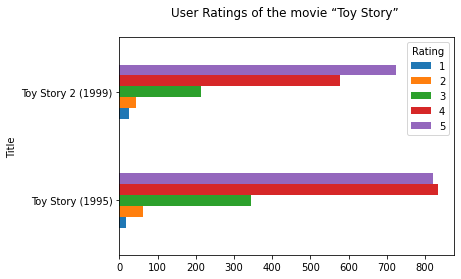

In [65]:
Toy_Story_Rating.unstack().plot(kind='barh', title= 'User Ratings of the movie “Toy Story” \n')
plt.show()

Maximum users have rated the movie 'Toy Story (1995)' as 4 followed by 5

and Toy Story 2 (1999) as 5 followed by 4

In [66]:
#Top_25 = Master_df.groupby('Title').Rating.count().sort_values(ascending = False).head(25)
Top_25 = Master_df.groupby('Title').Rating.count().nlargest(25)
Top_25

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

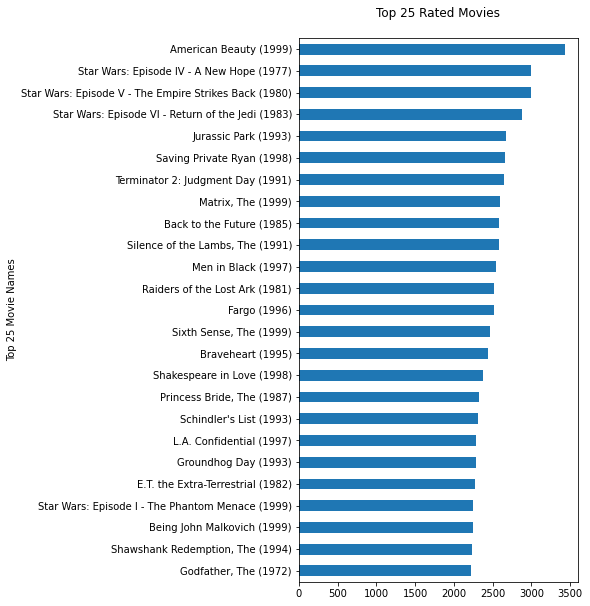

In [67]:
Top_25.sort_values().plot(kind='barh', figsize = (5,10), title= 'Top 25 Rated Movies\n', xlabel = 'Top 25 Movie Names', ylabel = 'Total Ratings' )
plt.show()

The above chart shows Top 25 movies by viewership rating.

In [68]:
user_rating_2696 = Master_df[Master_df['UserID'] == 2696]

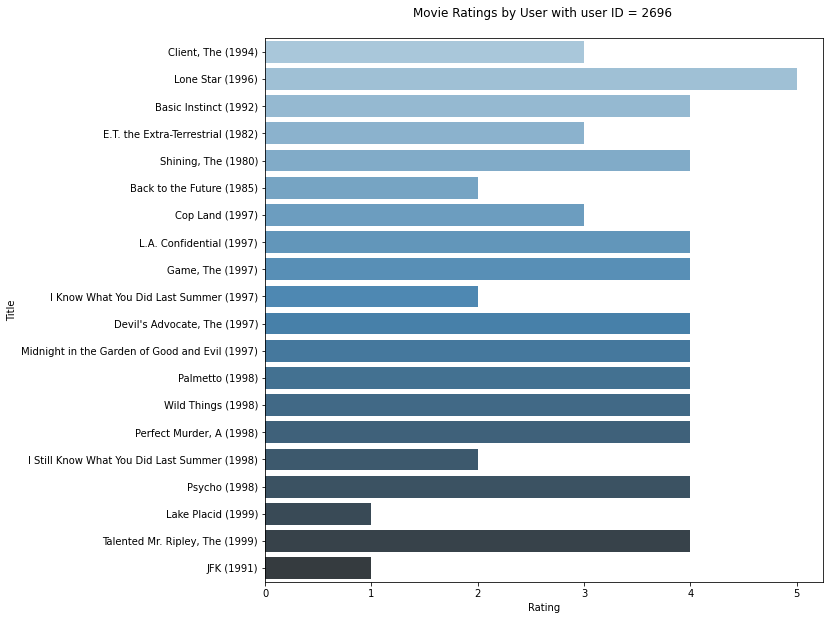

In [69]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(data = user_rating_2696, x= 'Rating', y='Title', palette="Blues_d" )
ax.set_title('Movie Ratings by User with user ID = 2696 \n')
plt.show()

The above chart shows Ratings for all the movies reviewed by a user with user id = 2696

#### Q4. Feature Engineering:
    
    Use column genres:

      1. Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres).
      2. Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
      3. Determine the features affecting the ratings of any particular movie.
      4. Develop an appropriate model to predict the movie ratings.

In [70]:
#Splitting Genre column and finding unique categories of Genres

temp = Master_df.Genres.str.split('|', expand = True)
temp[0].unique()

array(['Animation', 'Adventure', 'Comedy', 'Action', 'Drama', 'Thriller',
       'Crime', 'Romance', "Children's", 'Documentary', 'Sci-Fi',
       'Horror', 'Western', 'Mystery', 'Film-Noir', 'War', 'Fantasy',
       'Musical'], dtype=object)

In [71]:
#Encoding Genre column

Genre_encoding = Master_df['Genres'].str.get_dummies("|")

Genre_encoding.head(2)

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

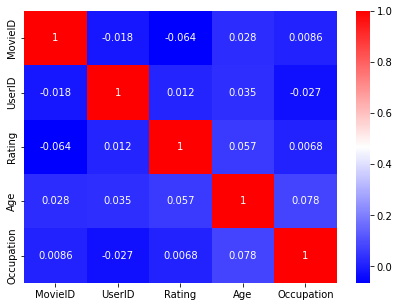

In [72]:
#Correlation between the variables

fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(Master_df.corr(),annot=True,cmap='bwr')

In [73]:
#Droping 'Genres' and 'Title' column

Master_df.drop(['Genres','Title'],axis=1,inplace=True)
Master_df.head(2)


,MovieID,UserID,Rating,Gender,Age,Occupation
0,1,1,5,F,1,10
1,1,6,4,F,50,9


In [74]:
#Encoding Gender column

Master_df.Gender = pd.get_dummies(Master_df, columns = ['Gender'], drop_first = True)

In [75]:
Master_df.head(2)

,MovieID,UserID,Rating,Gender,Age,Occupation
0,1,1,5,1,1,10
1,1,6,4,1,50,9


In [76]:
#Final encoded dataset

Master_df_final = pd.concat([Master_df, Genre_encoding],axis=1)

Master_df_final.head(2)

,MovieID,UserID,Rating,Gender,Age,Occupation,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,5,1,1,10,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,6,4,1,50,9,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [77]:
#Scaling

#scaler = StandardScaler()
#df_scaled = pd.DataFrame(scaler.fit_transform(Master_df_final), columns = Master_df_final.columns)

#### Implementing Decision Tree Classifier

In [78]:
X = Master_df_final.drop('Rating',axis=1)

In [79]:
y = Master_df_final.Rating

In [80]:
# fit model on training data

decision_tree = DecisionTreeClassifier()

decision_tree.fit(X, y)

DecisionTreeClassifier()

In [81]:
# make predictions for test data
Pred_y = decision_tree.predict(X)

In [82]:
acc_train = decision_tree.score(X, y) * 100
acc_train

100.0

In [83]:
print('Accuracy score for Decision Tree is : ', accuracy_score(y,Pred_y)*100 )

Accuracy score for Decision Tree is :  100.0


#### Implementing XG Boost Classifier

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state = 7)

In [85]:
# fit model on training data

model = XGBClassifier()

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [86]:
# make predictions for test data
y_pred = model.predict(X_test)

In [87]:
print('Accuracy score for XG Boost is : ' , accuracy_score(y_test,y_pred)*100)

Accuracy score for XG Boost is :  41.41496952306682


#### Implementing Random Forest Classifier

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state=40)

In [89]:
# fit model on training data

model_rfc = RandomForestClassifier(n_estimators=100)

model_rfc.fit(X_train, y_train)

RandomForestClassifier()

In [90]:
# make predictions for test data
y_pred = model_rfc.predict(X_test)

In [91]:
print('Accuracy score for Random Forest Classifier is : ' , accuracy_score(y_test,y_pred)*100)

Accuracy score for Random Forest Classifier is :  33.29067562478546


##### Conclusion


The Decision Tree Model works best for this data.

Project Submitted by

Archana Kokate